In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

In [2]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [3]:
# 디렉토리가 없으면 생성
import os
folder = "sp500_price/"
if not os.path.isdir(folder):
    os.mkdir(folder)

In [6]:
import csv
import pandas as pd

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    if os.path.exists(csv_fn):
        print('skip', csv_fn)
        continue

    try:
      print(csv_fn, end=' ')
      df = fdr.DataReader(sym, '2002-01-01', '2022-12-01')
      df['Symbol'] = sym
      print(len(df), 'rows')
      df.to_csv(csv_fn, quoting=csv.QUOTE_MINIMAL)
    except ValueError as e:
      print(e)

skip sp500_price/MMM.csv
skip sp500_price/AOS.csv
skip sp500_price/ABT.csv
skip sp500_price/ABBV.csv
skip sp500_price/ABMD.csv
skip sp500_price/ACN.csv
skip sp500_price/ATVI.csv
skip sp500_price/ADM.csv
skip sp500_price/ADBE.csv
skip sp500_price/ADP.csv
skip sp500_price/AAP.csv
skip sp500_price/AES.csv
skip sp500_price/AFL.csv
skip sp500_price/A.csv
skip sp500_price/APD.csv
skip sp500_price/AKAM.csv
skip sp500_price/ALK.csv
skip sp500_price/ALB.csv
skip sp500_price/ARE.csv
skip sp500_price/ALGN.csv
skip sp500_price/ALLE.csv
skip sp500_price/LNT.csv
skip sp500_price/ALL.csv
skip sp500_price/GOOGL.csv
skip sp500_price/GOOG.csv
skip sp500_price/MO.csv
skip sp500_price/AMZN.csv
skip sp500_price/AMCR.csv
skip sp500_price/AMD.csv
skip sp500_price/AEE.csv
skip sp500_price/AAL.csv
skip sp500_price/AEP.csv
skip sp500_price/AXP.csv
skip sp500_price/AIG.csv
skip sp500_price/AMT.csv
skip sp500_price/AWK.csv
skip sp500_price/AMP.csv
skip sp500_price/ABC.csv
skip sp500_price/AME.csv
skip sp500_price

In [7]:
import numpy as np
import pandas as pd

import os
print(os.listdir("./sp500_price"))

['A.csv', 'AAL.csv', 'AAP.csv', 'AAPL.csv', 'ABBV.csv', 'ABC.csv', 'ABMD.csv', 'ABT.csv', 'ACGL.csv', 'ACN.csv', 'ADBE.csv', 'ADI.csv', 'ADM.csv', 'ADP.csv', 'ADSK.csv', 'AEE.csv', 'AEP.csv', 'AES.csv', 'AFL.csv', 'AIG.csv', 'AIZ.csv', 'AJG.csv', 'AKAM.csv', 'ALB.csv', 'ALGN.csv', 'ALK.csv', 'ALL.csv', 'ALLE.csv', 'AMAT.csv', 'AMCR.csv', 'AMD.csv', 'AME.csv', 'AMGN.csv', 'AMP.csv', 'AMT.csv', 'AMZN.csv', 'ANET.csv', 'ANSS.csv', 'AON.csv', 'AOS.csv', 'APA.csv', 'APD.csv', 'APH.csv', 'APTV.csv', 'ARE.csv', 'ATO.csv', 'ATVI.csv', 'AVB.csv', 'AVGO.csv', 'AVY.csv', 'AWK.csv', 'AXP.csv', 'AZO.csv', 'BA.csv', 'BAC.csv', 'BALL.csv', 'BAX.csv', 'BBWI.csv', 'BBY.csv', 'BDX.csv', 'BEN.csv', 'BFB.csv', 'BIIB.csv', 'BIO.csv', 'BK.csv', 'BKNG.csv', 'BKR.csv', 'BLK.csv', 'BMY.csv', 'BR.csv', 'BRKB.csv', 'BRO.csv', 'BSX.csv', 'BWA.csv', 'BXP.csv', 'C.csv', 'CAG.csv', 'CAH.csv', 'CARR.csv', 'CAT.csv', 'CB.csv', 'CBOE.csv', 'CBRE.csv', 'CCI.csv', 'CCL.csv', 'CDAY.csv', 'CDNS.csv', 'CDW.csv', 'CE.csv', '

In [8]:
df_20year = []
folder = "sp500_price/"

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    
    try:
        df = pd.read_csv(csv_fn)
        if (len(df) != 5266):
            df_20year.append(csv_fn)
    except FileNotFoundError as e:
        print(e)

In [9]:
file_path_list = df_20year

for i in df_20year:
    if os.path.exists(i):
        os.remove(i)

In [ ]:
df_price = pd.DataFrame()

folder = "sp500_price/"

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    
    try:
        df = pd.read_csv(csv_fn, parse_dates=True, index_col='Date')
        df_price[sym] = df['Adj Close']
    except FileNotFoundError as e:
        print(e)

In [11]:
us500 = fdr.DataReader('US500', '2002-01-01', '2022-12-01')
df_price['S&P500'] = us500['Adj Close']
df_price

C:\Users\indi\AppData\Local\Temp\ipykernel_17436\1728666423.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_price['S&P500'] = us500['Adj Close']


,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,XEL,YUM,ZBRA,ZBH,ZION,S&P500
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,33.620800,2.242219,15.308865,15.960000,19.180223,2.927909,8.913301,15.845819,29.148270,14.439046,...,42.054478,9.484230,39.261757,33.184170,12.236266,6.163587,24.813334,26.792725,36.531719,1154.670044
2002-01-03,33.508873,2.296078,15.322566,15.450000,18.580154,2.920151,8.818950,16.462929,29.133347,13.689590,...,42.262131,9.349103,39.762962,33.933777,12.292657,6.293305,25.435556,26.624321,37.133739,1165.270020
2002-01-04,33.609318,2.374527,15.295152,16.059999,20.270590,2.973346,8.491853,17.866354,29.083633,12.843437,...,42.844795,9.100769,39.679417,34.135071,12.197229,6.537331,26.133333,26.190035,37.445362,1172.510010
2002-01-07,33.207504,2.361647,15.188223,15.820000,19.355858,2.885797,8.447826,17.995750,28.462189,12.631896,...,42.515949,9.129990,38.677010,34.030968,12.283981,6.659344,25.680000,26.190035,37.424114,1164.890015
2002-01-08,33.020947,2.259781,15.089539,16.270000,19.963236,2.881363,8.636530,18.234634,28.437334,12.420356,...,41.829468,9.301631,36.254459,34.044842,12.153852,6.787779,25.799999,27.032019,37.360382,1160.709961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,128.000000,61.529999,106.019997,377.779999,294.529999,76.589996,96.779999,335.779999,261.313782,150.550003,...,148.350006,33.404499,241.309998,604.320007,69.199997,125.930000,270.660004,118.010002,51.520000,4027.260010
2022-11-25,129.039993,61.860001,106.959999,378.079987,296.399994,73.470001,97.400002,334.299988,262.677216,150.000000,...,148.770004,33.473618,244.020004,604.250000,69.629997,126.529999,271.899994,119.209999,51.750000,4026.120117
2022-11-28,124.639999,59.759998,105.389999,377.230011,290.600006,74.720001,96.250000,328.970001,257.084290,150.619995,...,143.820007,33.058899,239.570007,594.559998,69.389999,126.449997,269.000000,117.669998,50.230000,3963.939941


In [15]:
df_price.to_csv("Stock_price.csv")

In [33]:
df_logretrun = np.log(df_price / df_price.shift(1))
df_logretrun = df_logretrun.dropna(axis=0)
df_logretrun.to_csv("Stock_LogReturn.csv")

In [40]:
sort_log_return = df_logretrun.mean().sort_values(ascending=False)
df_logretrun.loc[:, sort_log_return[:50].keys()].to_csv("top50-Stock_LogReturn.csv")

In [22]:
df_retrun = df_price.pct_change()
df_retrun = df_retrun.dropna(axis=0)
df_retrun = df_retrun

acc_returns = (df_price.pct_change() + 1).product() - 1
sort_acc_returns =  acc_returns.sort_values(ascending=False)

In [124]:
df_retrun.to_csv("df_retrun.csv")

In [24]:
df_retrun.loc[:, sort_acc_returns[:50].keys()].to_csv("top50_Stock_Return.csv")

In [42]:
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

In [72]:
df = pd.DataFrame()
df['S&P500'] = us500.loc[:, 'Adj Close'] # S&P500 지수
#df[best20.keys()] = df_price.loc[:, best20.keys()]

,S&P500
Date,
2002-01-02,NaN
2002-01-03,0.009180
2002-01-04,0.006213
2002-01-07,-0.006499
2002-01-08,-0.003588
...,...
2022-11-23,0.005915
2022-11-25,-0.000283
2022-11-28,-0.015444


In [110]:
# 종목간 상관관계
changes = df_retrun.pct_change()
corr = changes.corr()
corr.head(10)

,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,XEL,YUM,ZBRA,ZBH,ZION,SP500
MMM,1.000000,0.010838,0.016480,0.000634,-0.028609,0.006671,0.000377,0.009043,0.015917,-0.005402,...,-0.004300,-0.001562,0.000125,-0.010204,-0.012202,-0.003720,0.006431,0.004722,0.000578,0.002245
AOS,0.010838,1.000000,0.011374,-0.003619,-0.016515,0.005215,0.000357,-0.016721,0.010137,-0.002817,...,0.022663,0.000199,0.003428,-0.000389,0.011696,0.010650,0.009859,0.011743,-0.005505,0.006848
ABT,0.016480,0.011374,1.000000,-0.002589,0.011594,-0.027369,0.007144,0.009184,-0.009510,-0.020681,...,-0.000098,-0.000729,-0.002233,-0.009908,0.021309,0.001968,0.025110,0.008368,0.000003,0.011917
ABMD,0.000634,-0.003619,-0.002589,1.000000,-0.002358,-0.000625,0.000143,0.015811,-0.004800,0.010787,...,0.068722,-0.000645,-0.000933,0.006130,0.006962,-0.006576,0.000753,0.008444,-0.000775,0.002019
ACN,-0.028609,-0.016515,0.011594,-0.002358,1.000000,-0.001839,0.000480,0.009848,0.010825,-0.001806,...,-0.007764,-0.001664,-0.001367,0.007322,0.015660,0.009291,0.000306,0.018344,0.000420,-0.003046
ATVI,0.006671,0.005215,-0.027369,-0.000625,-0.001839,1.000000,-0.001179,-0.012424,0.009938,-0.002892,...,-0.006204,-0.011422,-0.024120,0.006091,0.028909,0.015955,-0.008145,-0.012735,-0.002550,-0.010572
ADM,0.000377,0.000357,0.007144,0.000143,0.000480,-0.001179,1.000000,-0.002098,-0.000238,0.000209,...,-0.000226,0.000338,-0.000594,0.000319,0.000695,0.000372,-0.000140,0.000566,0.000188,-0.000406
ADBE,0.009043,-0.016721,0.009184,0.015811,0.009848,-0.012424,-0.002098,1.000000,0.025065,0.001761,...,0.016050,-0.006619,0.000932,-0.002431,0.000064,-0.009880,-0.000922,-0.007100,0.000655,-0.016376
ADP,0.015917,0.010137,-0.009510,-0.004800,0.010825,0.009938,-0.000238,0.025065,1.000000,0.001713,...,-0.003556,0.042879,-0.005724,-0.022984,0.002374,0.001836,-0.000673,0.004443,-0.002527,0.009266
AAP,-0.005402,-0.002817,-0.020681,0.010787,-0.001806,-0.002892,0.000209,0.001761,0.001713,1.000000,...,-0.000881,-0.000302,-0.000789,-0.001563,-0.004599,0.001941,0.002300,0.015830,-0.000409,-0.001374


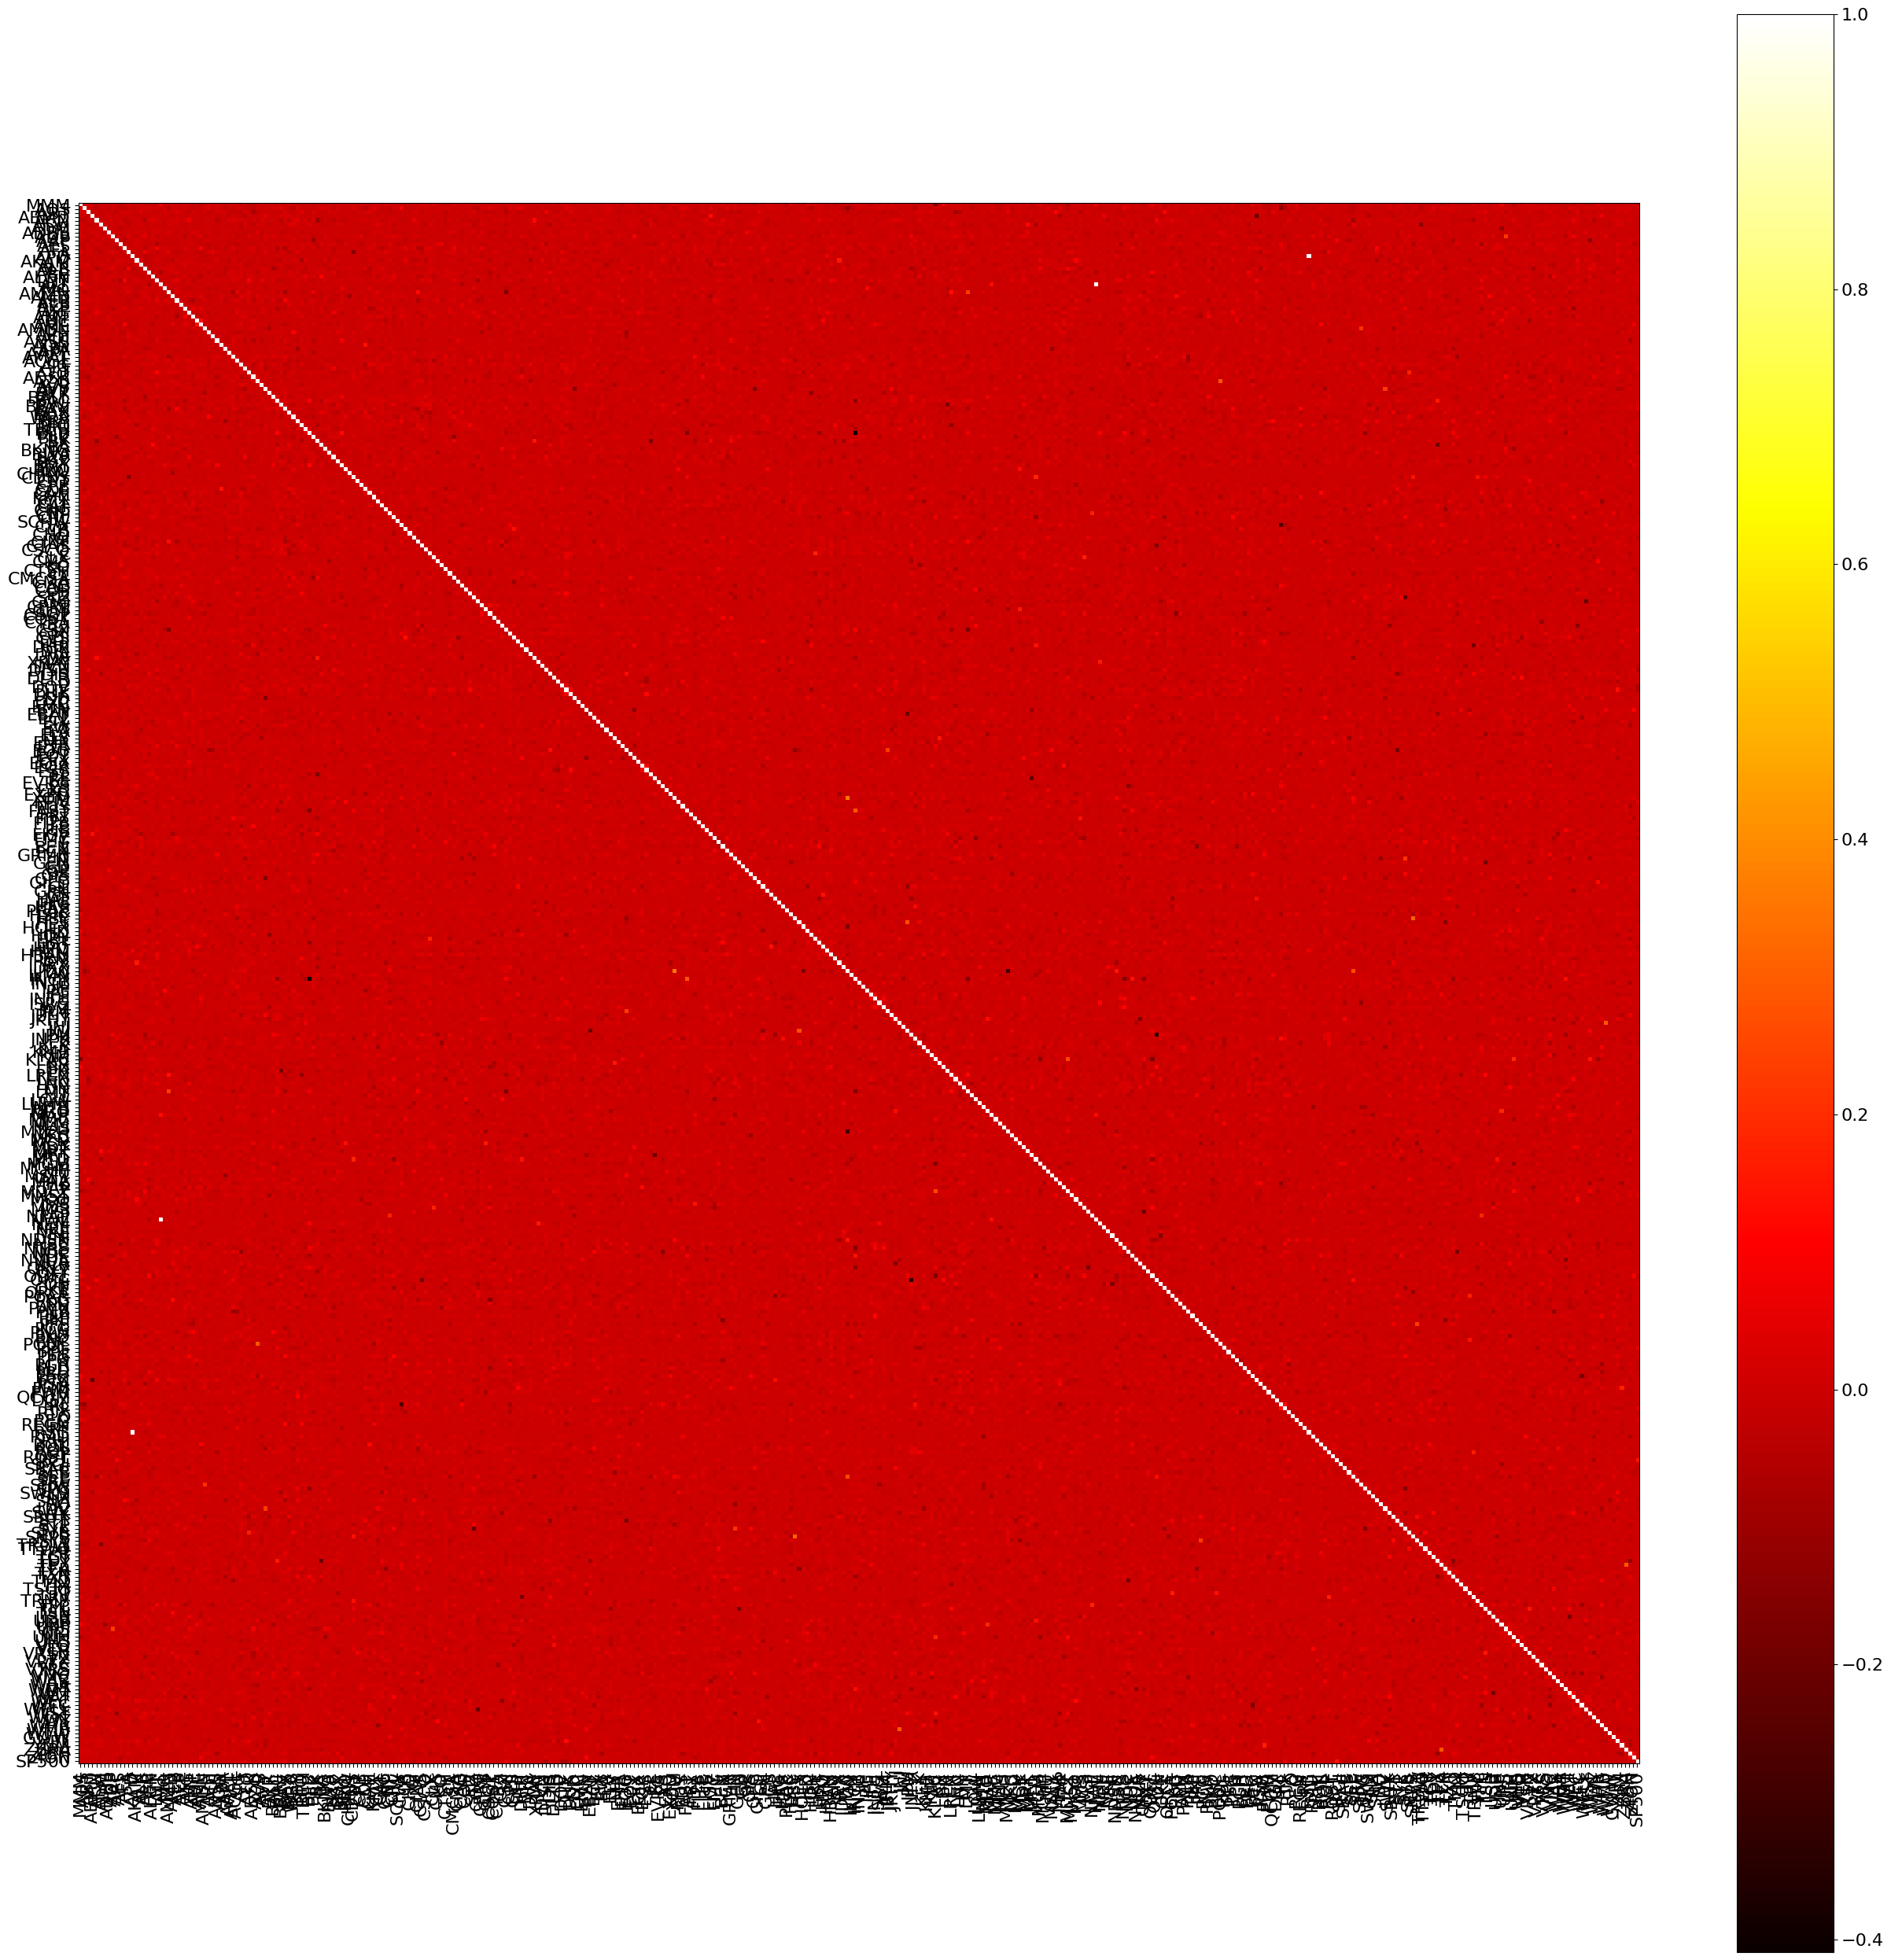

In [113]:
# 상관관계 히트맵

plt.figure(figsize=(32,32))
plt.grid(False)
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [114]:
# 상관계수 순위 만들기 (수익률 상위 20종목)
import pandas as pd

idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:20]

(APD, RSG)      0.999760
(ALL, NWL)      0.999292
(XOM, ITW)      0.360149
(HSY, SNPS)     0.308094
(TFX, ZBRA)     0.293586
(J, WMB)        0.292890
(AZO, POOL)     0.287589
(FAST, INCY)    0.286310
(HES, JCI)      0.267713
(ITW, SEE)      0.261271
(KLAC, MDLZ)    0.254407
(PFE, SYY)      0.234783
(EOG, IRM)      0.228250
(AMZN, LMT)     0.226947
(AVY, LUV)      0.225337
(ADP, UPS)      0.218125
(IT, SYK)       0.213688
(AMGN, SHW)     0.205551
(KLAC, UNH)     0.190723
(MRO, UNP)      0.188687
dtype: float64

In [119]:
# 지수와 상관관계
changes = df_price.pct_change()
corr = changes.corr()
corr['SP500'].sort_values(ascending=False)[1:]

TROW    0.815332
BEN     0.779428
ITW     0.778768
L       0.767881
EMR     0.765005
          ...   
KR      0.389387
EQIX    0.389193
MNST    0.360092
PCG     0.326848
NEM     0.245307
Name: SP500, Length: 388, dtype: float64

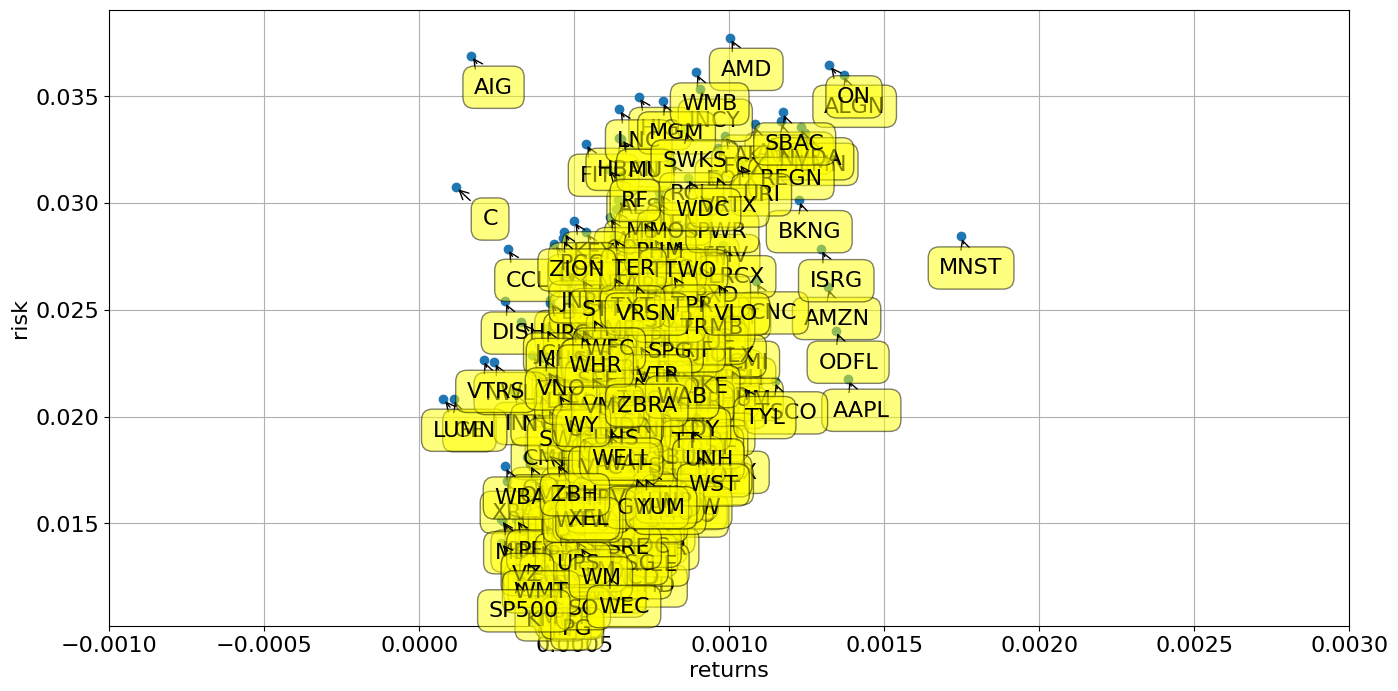

In [120]:
plt.figure(figsize=(16,8))
plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')
plt.xlim(-0.001, 0.003)
for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))   

In [ ]:
df = pd.DataFrame()

df['S&P500'] = us500.loc['2022', 'Adj Close'] # S&P500 지수
df[df_price.columns] = df_price.loc['2022', df_price.columns]

# 종목간 상관관계
changes = df.pct_change()
corr = changes.corr()

idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:40]

<AxesSubplot: xlabel='Date'>

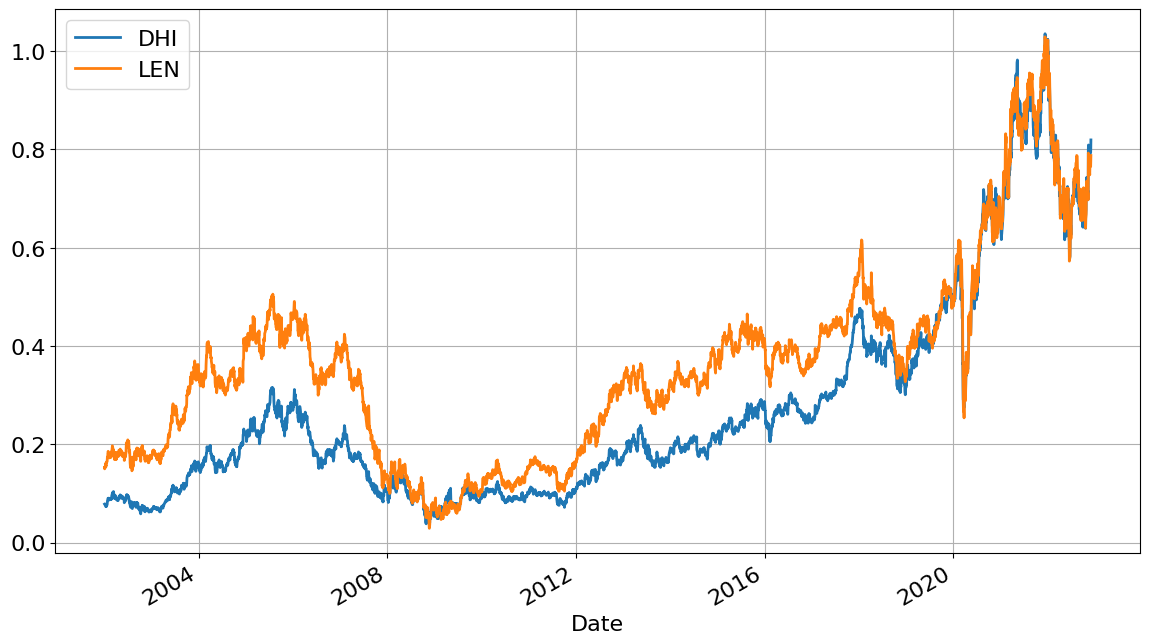

In [58]:
#df_price[['DHI', 'LEN']].plot()
df_plot = df_price[['DHI', 'LEN']]
df_plot = df_plot / (df_plot.max() - df_plot.min())
df_plot.plot()

<AxesSubplot: xlabel='Date'>

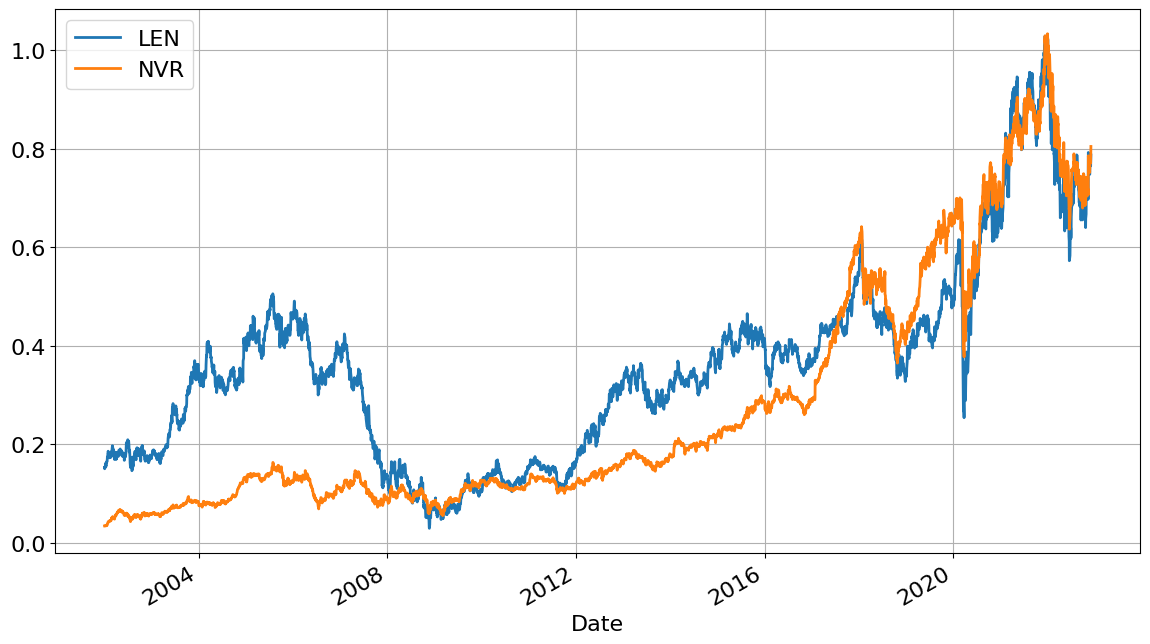

In [62]:
#df_price[['LEN', 'NVR']].plot()
df_plot = df_price[['LEN', 'NVR']]
df_plot = df_plot / (df_plot.max() - df_plot.min())
df_plot.plot()